# Advection Equation

\\(\frac{\partial f (L,t)}{\partial t} + g \frac{\partial f(L,t)}{\partial L} = 0 \\)

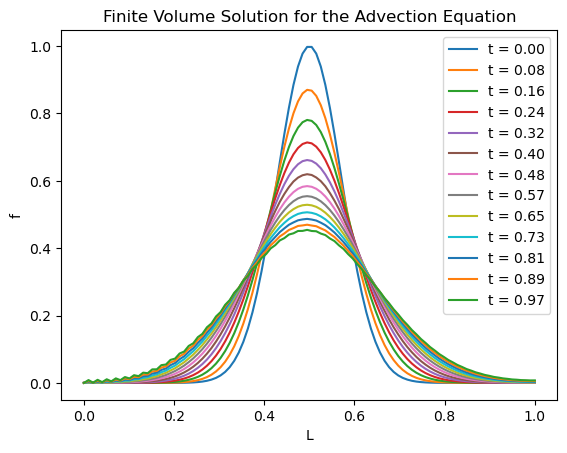

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the advection velocity
g = 1.0

# Define the initial condition for f(L, t)
def initial_condition(L):
    return np.exp(-100 * (L -0.5) ** 2)

# f[:-2]: left elements, f[1:-1]: center elements, f[2:]: right elements

# Define the finite volume flux computation
def compute_flux(f, g, dx):
    flux = np.zeros_like(f)
    flux[1:-1] = 0.5 * g * (f[:-2] + f[1:-1]) - 0.5 * g * (f[1:-1] + f[2:])
    return flux

# Define the advection equation for solve_ivp
def advection_equation(t, f, dx):
    flux = compute_flux(f, g, dx)
    df_dt = - (flux[1:] - flux[:-1]) / dx
    return np.hstack([0, df_dt])

# Define spatial domain
L_min = 0.0
L_max = 1.0
num_cells = 100
dx = (L_max - L_min) / num_cells

# Define time domain
t_min = 0.0
t_max = 1.0
num_time_steps = 100
t_eval = np.linspace(t_min, t_max, num_time_steps)

# Initial condition
f0 = initial_condition(np.linspace(L_min + 0.5 * dx, L_max - 0.5 * dx, num_cells))

# Use solve_ivp to integrate the advection equation
solution = solve_ivp(
    advection_equation,
    t_span=(t_min, t_max),
    y0=f0,
    args=(dx,),
    t_eval=t_eval,
    method='RK45'
)

# Get the solution at each time step
f_numerical = solution.y

# Plot the solution
L = np.linspace(L_min, L_max, num_cells)
for i in range(0, num_time_steps, 8):
    plt.plot(L, f_numerical[:, i], label=f't = {t_eval[i]:.2f}')
plt.xlabel('L')
plt.ylabel('f')
plt.title('Finite Volume Solution for the Advection Equation')
plt.legend()
plt.show()